In [2]:
# Import libraries:

import numpy as np
import pandas as pd
import keras
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [5]:
# Import dataset:
churn_data = pd.read_csv('Churn_modelling.csv', index_col='RowNumber')

In [6]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# Removing Unproductive columns:
churn_data.drop(['CustomerId','Surname'], axis=1, inplace=True)

In [10]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# some columns have text data so let's one hot encode them:
Geography_dummies = pd.get_dummies(prefix='Geo', data=churn_data,columns=['Geography'])

In [12]:
Geography_dummies.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,Female,42,2,0.00,1,1,1,101348.88,1,True,False,False
2,608,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True
3,502,Female,42,8,159660.80,3,1,0,113931.57,1,True,False,False
4,699,Female,39,1,0.00,2,0,0,93826.63,0,True,False,False
5,850,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [16]:
import pandas as pd

# Suppress the FutureWarning
pd.set_option('future.no_silent_downcasting', True)

Gender_dummies = Geography_dummies.replace(to_replace={'Gender': {'Female': 1, 'Male': 0}})


In [17]:
Gender_dummies.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,True,False,False
2,608,1,41,1,83807.86,1,0,1,112542.58,0,False,False,True
3,502,1,42,8,159660.80,3,1,0,113931.57,1,True,False,False
4,699,1,39,1,0.00,2,0,0,93826.63,0,True,False,False
5,850,1,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [18]:
churn_data_encoded = Gender_dummies

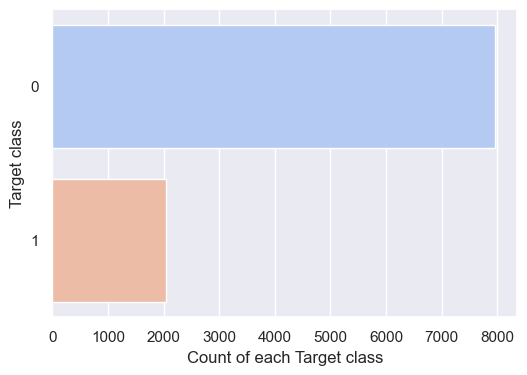

In [25]:
# Adjust the figure size
plt.figure(figsize=(6, 4))  # (width, height)

# Create a count plot with hue assigned to 'Exited'
sns.countplot(y='Exited', hue='Exited', data=churn_data_encoded, palette="coolwarm", legend=False)

# Customize labels
plt.xlabel('Count of each Target class')
plt.ylabel('Target class')

# Display the plot
plt.show()


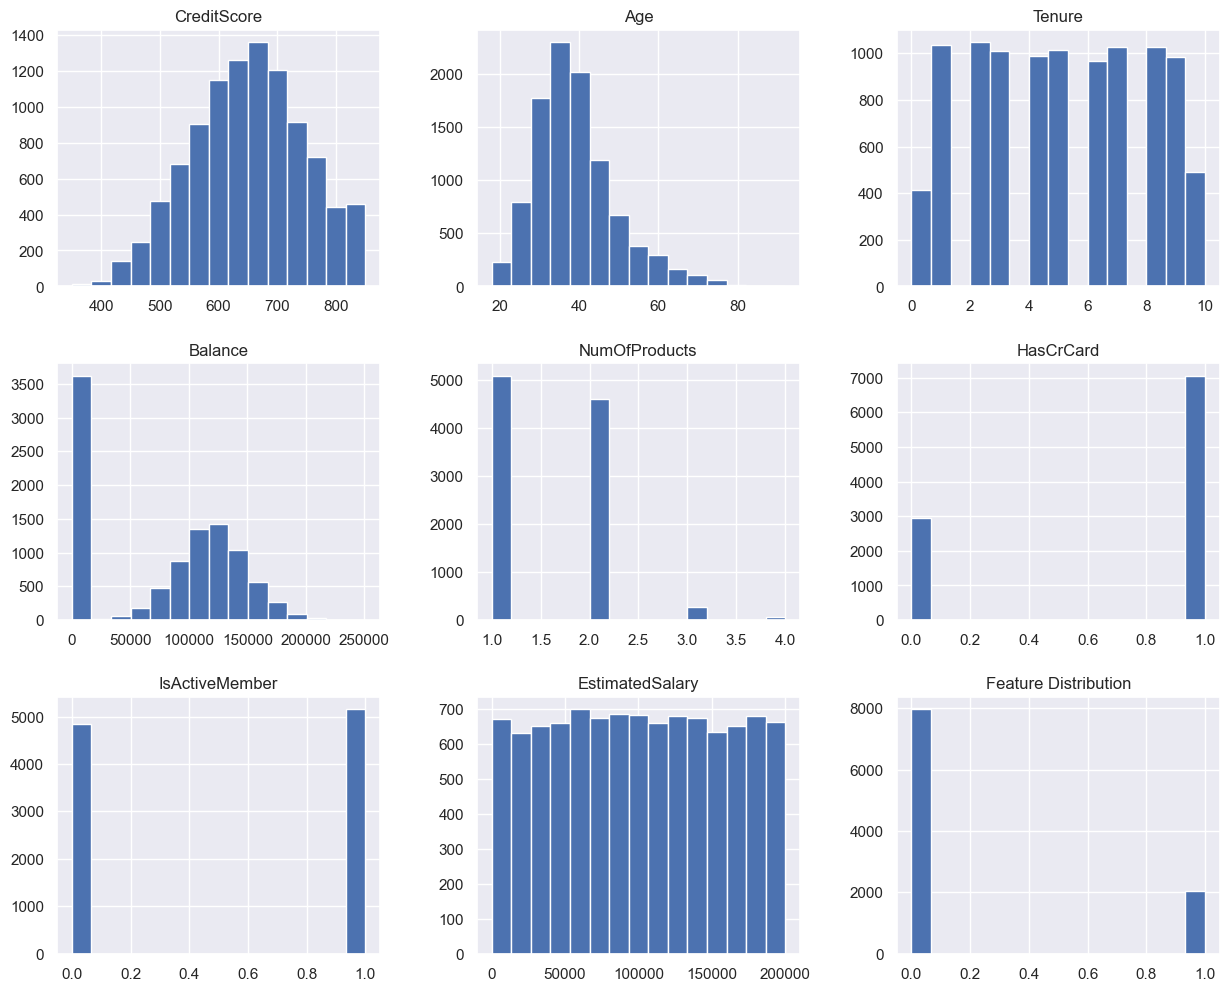

In [27]:
churn_data_encoded.hist(figsize=(15,12), bins = 15)
plt.title('Feature Distribution')
plt.show()

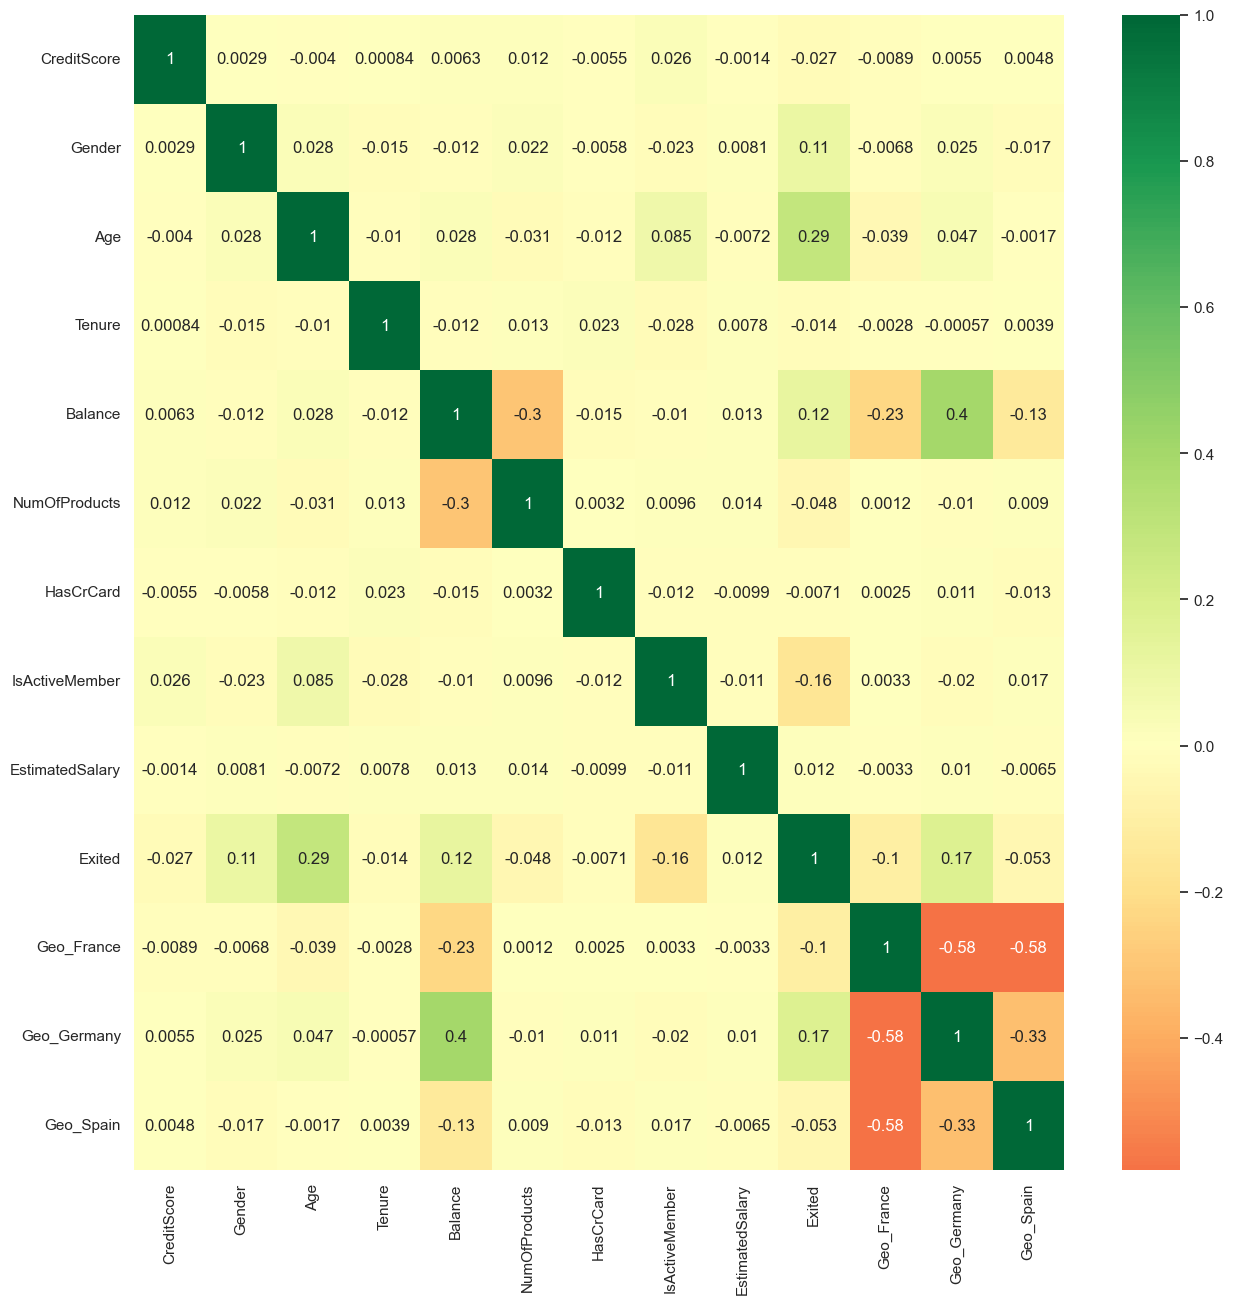

In [29]:
plt.figure(figsize=(15,15))
p=sns.heatmap(churn_data_encoded.corr(), annot=True,cmap='RdYlGn',center=0) 

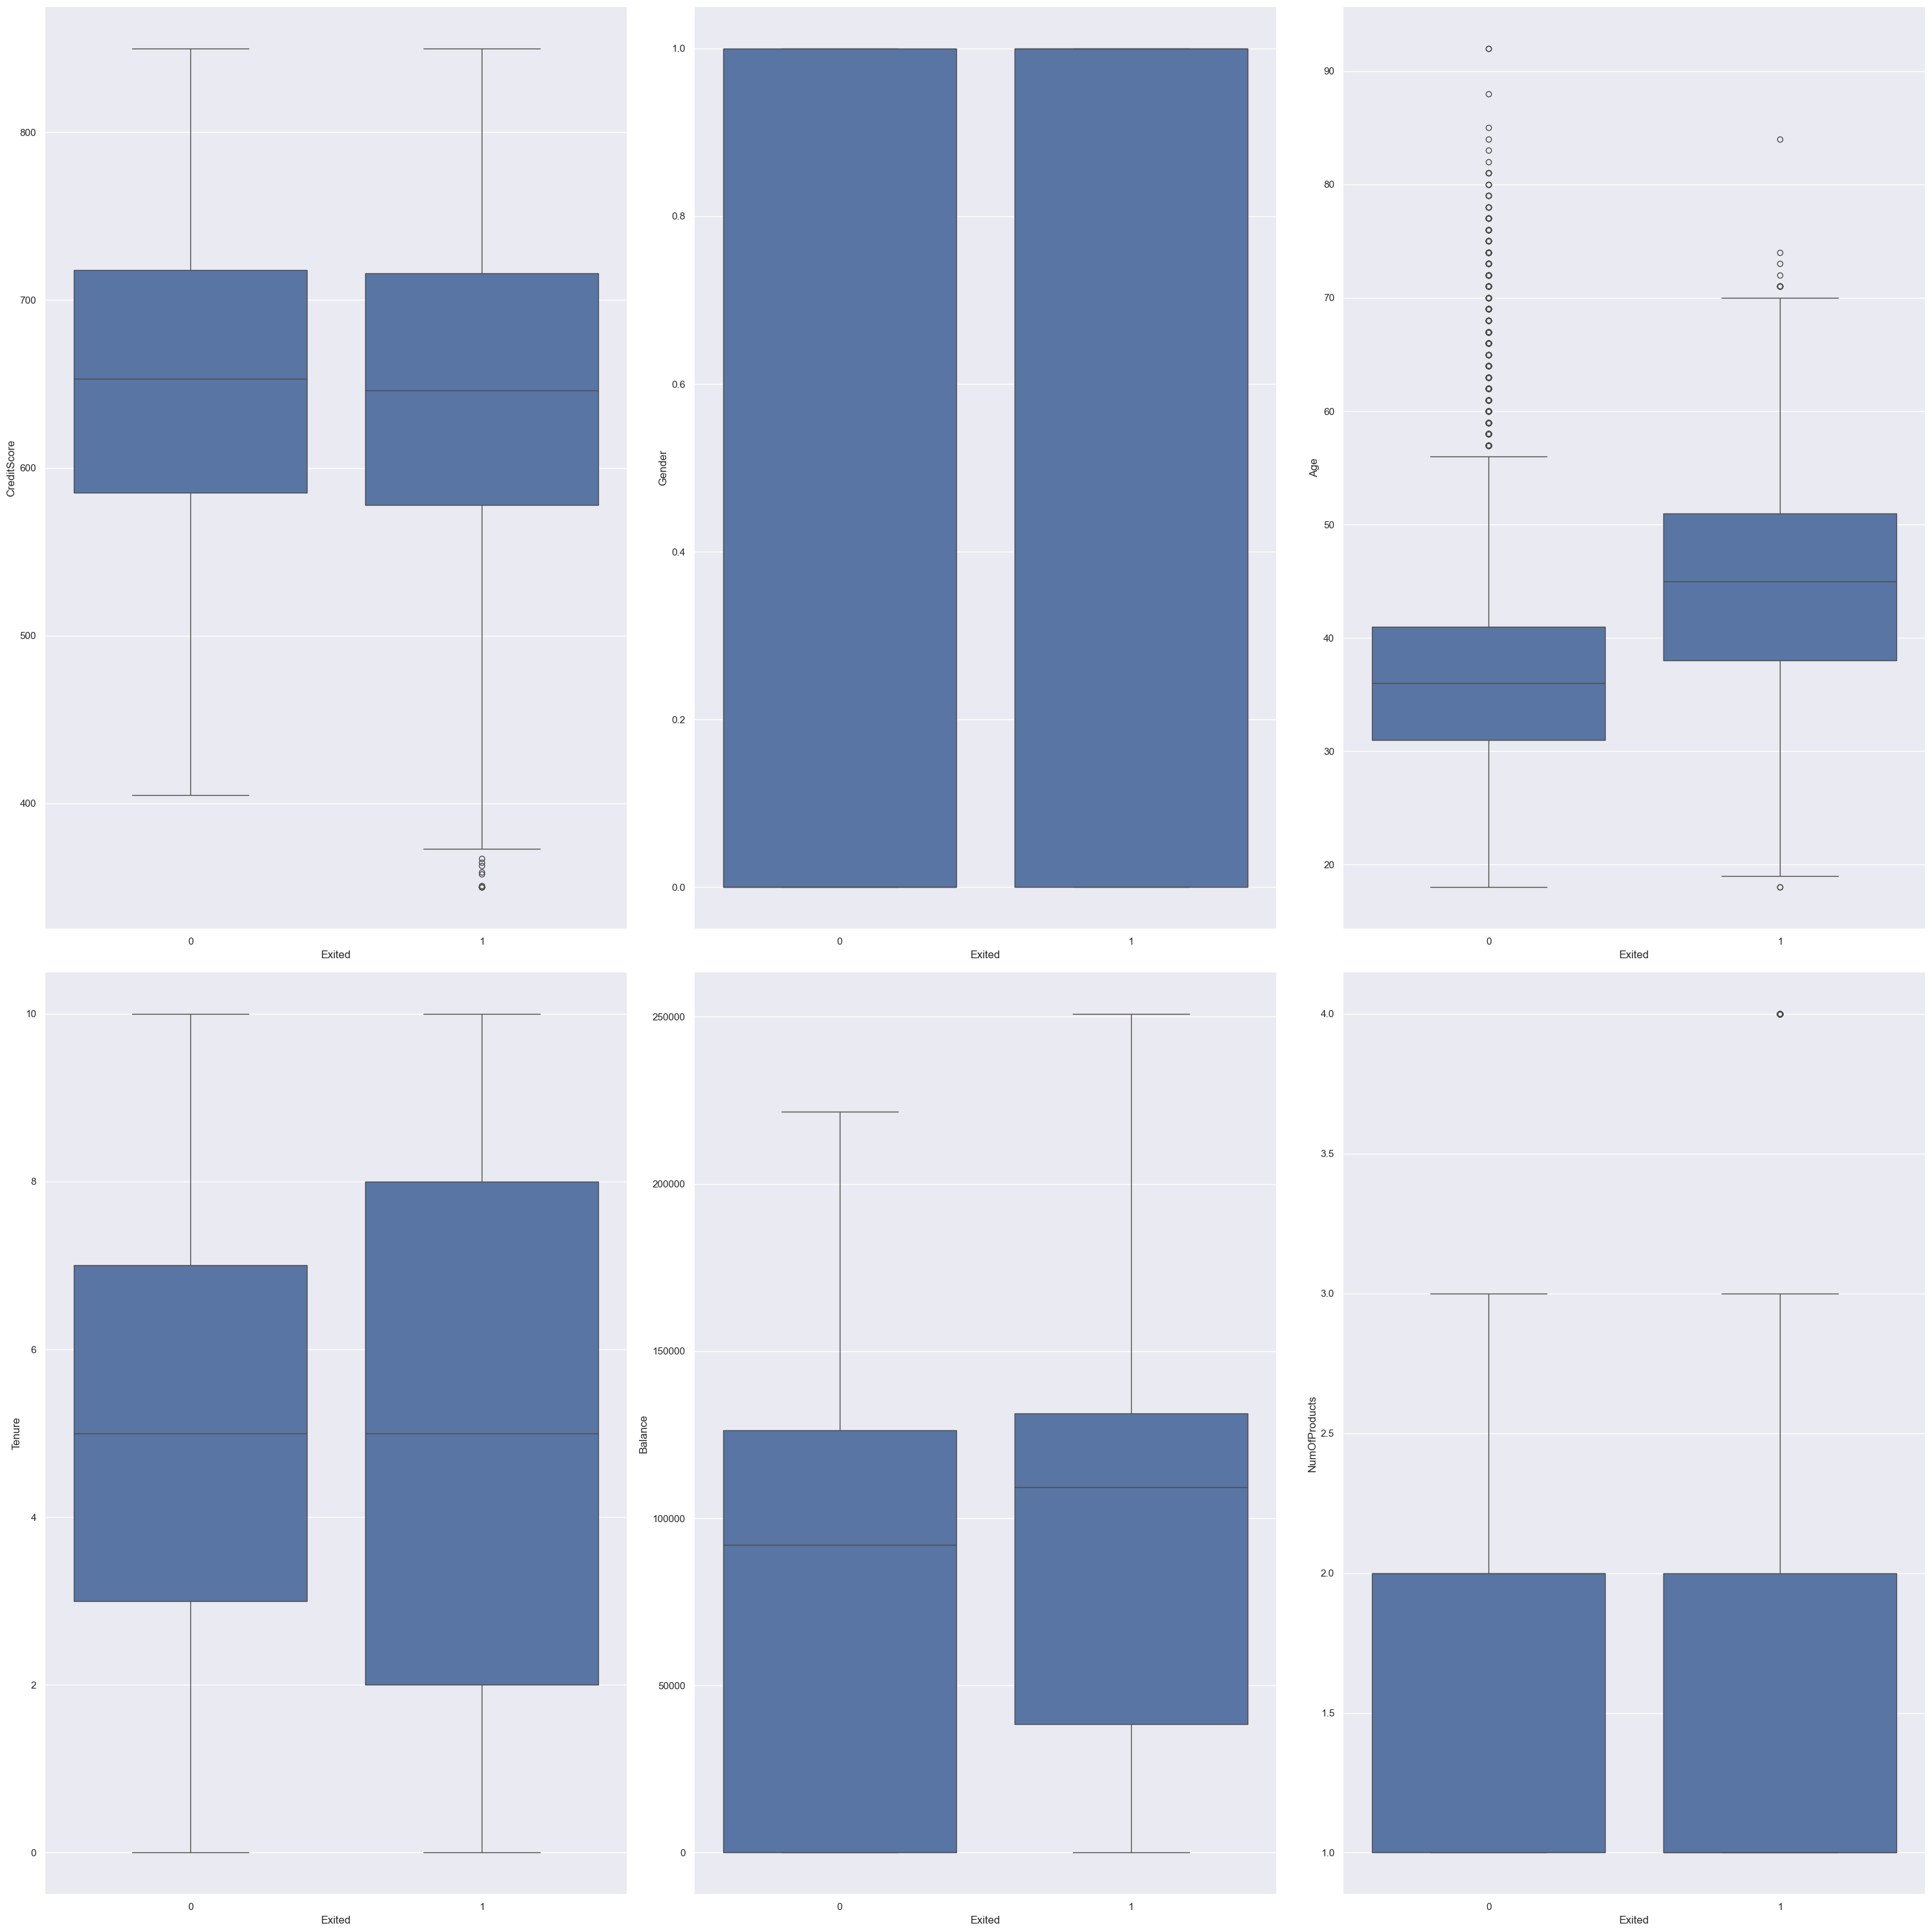

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(30, 30))  # nrows is 2
nrows = 2  # Define nrows explicitly
ncols = 3  # Define ncols explicitly
row = 0
col = 0

for i in range(min(len(churn_data_encoded.columns) - 1, nrows * ncols)):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row, col]
    sns.boxplot(x=churn_data_encoded['Exited'], y=churn_data_encoded[churn_data_encoded.columns[i]], ax=axes)
    col += 1

plt.tight_layout()
plt.show()


In [35]:
x = churn_data_encoded.drop(['Exited'], axis = 1)
y = churn_data_encoded.Exited

In [37]:
x.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,True,False,False
2,608,1,41,1,83807.86,1,0,1,112542.58,False,False,True
3,502,1,42,8,159660.80,3,1,0,113931.57,True,False,False
4,699,1,39,1,0.00,2,0,0,93826.63,True,False,False
5,850,1,43,2,125510.82,1,1,1,79084.10,False,False,True
6,645,0,44,8,113755.78,2,1,0,149756.71,False,False,True
7,822,0,50,7,0.00,2,1,1,10062.80,True,False,False
8,376,1,29,4,115046.74,4,1,0,119346.88,False,True,False
9,501,0,44,4,142051.07,2,0,1,74940.50,True,False,False


In [38]:
# Splitting the data into training and test data:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)

In [39]:
# Feature scalling because yes ww don't want one independent variable dominating the other and it makes computation easy:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [42]:
# sequential model to initialise our ANN and dense Module to build the layers:
from keras.models import Sequential
from keras.layers import Dense

In [47]:
classifier = Sequential()

# Adding the input layer and first hidden layer:
classifier.add(Dense(units=6,kernel_initializer='uniform',activation = 'relu'))

# Adding the second hidden layer:
classifier.add(Dense(units=6,kernel_initializer='uniform', activation='relu'))

# Adding the output layer:
classifier.add(Dense(units=1, kernel_initializer='uniform',activation='sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN:
classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

# Fitting the ANN to the training set:
classifier.fit(x_train, y_train, batch_size=10, epochs=50, verbose=0)

score,acc = classifier.evaluate(x_train, y_train, batch_size=10)

print('Train score:', score)
print('train accuracy:', acc)

# Making predictions and evaluating the model:
# Predicting the test set results:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

print("*" * 20)

score, acc = classifier.evaluate(x_test, y_test, batch_size=10)

print('test score:', score)
print('test accuracy:', acc)

# Making the confusion matrix:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

670/670 [==============================] - 2s 2ms/step - loss: 0.3985 - accuracy: 0.8370
Train score: 0.39845848083496094
train accuracy: 0.83701491355896
104/104 [==============================] - 0s 2ms/step
********************
330/330 [==============================] - 1s 2ms/step - loss: 0.4022 - accuracy: 0.8382
test score: 0.4022480547428131
test accuracy: 0.8381817936897278


# Evaluating the Metrics:

Text(0.5, 20.049999999999997, 'Predicted label')

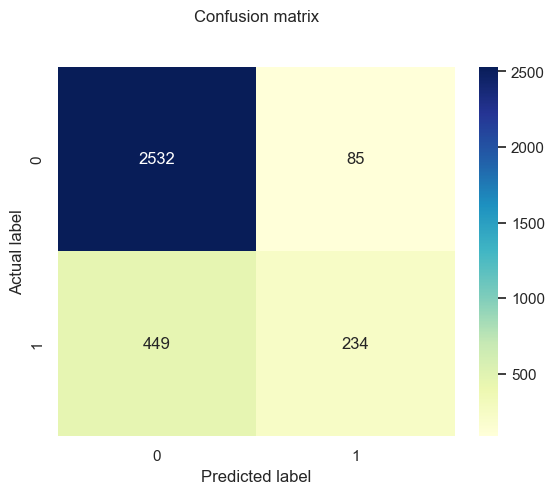

In [49]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [50]:
# Import classification_report:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      2617
           1       0.73      0.34      0.47       683

    accuracy                           0.84      3300
   macro avg       0.79      0.66      0.69      3300
weighted avg       0.83      0.84      0.81      3300



104/104 [==============================] - 0s 2ms/step


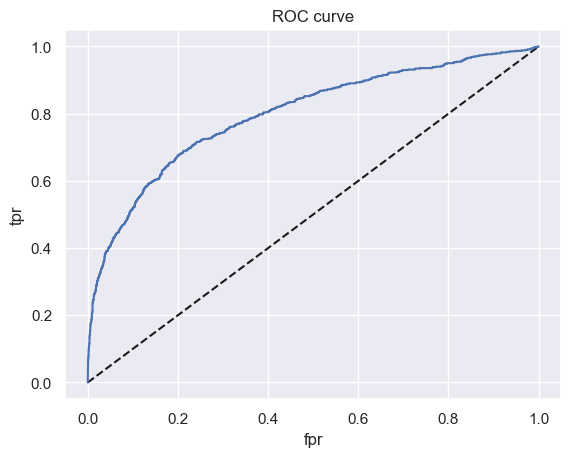

In [54]:
from sklearn.metrics import roc_curve
y_pred_proba = classifier.predict(x_test)
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [55]:
# Area under ROC Ccurve:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7987035438407842

# 12. Evaluation of Multiple Training Instances

In [61]:
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Your existing code
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=12))
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn=build_classifier, batch_size=10, epochs=50, verbose=0)
accuracies = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=5)
mean = accuracies.mean()
variance = accuracies.std()

print(f"Mean Accuracy: {mean}")
print(f"Variance: {variance}")


Mean Accuracy: 0.8447761297225952
Variance: 0.013849267424065287


In [62]:
print('Mean accuracy score of 10 different models using Kfold cross validation: {}'.format(mean))
print('Standard Deviation of accuracy score of 10 different models using Kfold cross validation: {}'.format(variance))

Mean accuracy score of 10 different models using Kfold cross validation: 0.8447761297225952
Standard Deviation of accuracy score of 10 different models using Kfold cross validation: 0.013849267424065287


# Improving ANN with Dropout layer

In [65]:
# Improving the ANN
from keras.layers import Dropout
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
classifier.add(Dropout(rate = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(x_train, y_train, batch_size = 10, epochs = 50,verbose = 0)

# Part 3 - Making predictions and evaluating the model

score, acc = classifier.evaluate(x_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(x_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


670/670 [==============================] - 3s 3ms/step - loss: 0.4054 - accuracy: 0.8352
Train score: 0.4054111838340759
Train accuracy: 0.8352238535881042
104/104 [==============================] - 1s 3ms/step
********************
330/330 [==============================] - 1s 3ms/step - loss: 0.4105 - accuracy: 0.8388
Test score: 0.41047751903533936
Test accuracy: 0.838787853717804


Text(0.5, 20.049999999999997, 'Predicted label')

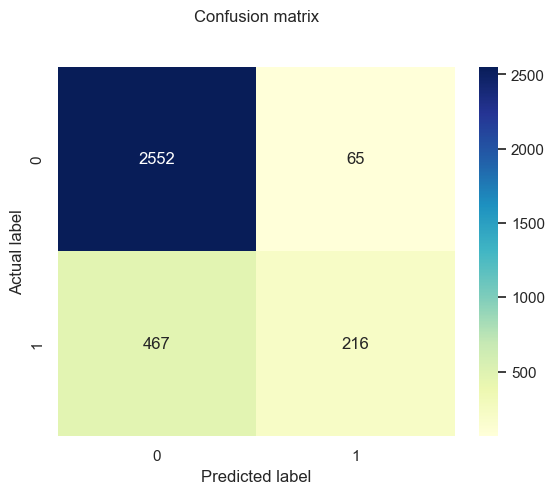

In [66]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [67]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2617
           1       0.77      0.32      0.45       683

    accuracy                           0.84      3300
   macro avg       0.81      0.65      0.68      3300
weighted avg       0.83      0.84      0.81      3300



104/104 [==============================] - 0s 2ms/step


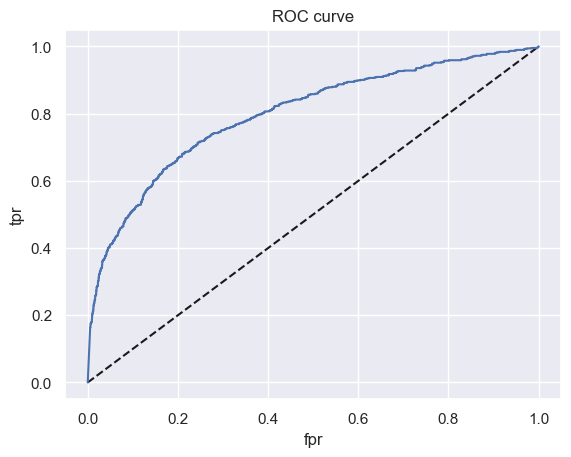

In [73]:
try:
    # Your existing code
    from sklearn.metrics import roc_curve
    y_pred_proba = classifier.predict(x_test)  # This will raise an AttributeError
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='ANN')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve')
    plt.show()
except AttributeError:
    print("The 'predict_proba' method is not available. Use 'predict' instead.")


In [74]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7989259325359417